Import libraries

In [2]:

import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D

from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm

Extract file names from data folder

In [27]:
datanames = []
for imag in os.listdir('data'):
    datanames.append(os.path.join('data',imag))

In [28]:
len(datanames)

44442

Importing ResNet50 Model and its Configuration

In [13]:
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
model.trainable = False

model = tf.keras.Sequential([
    model,
    GlobalMaxPool2D()
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d (Globa  (None, 2048)             0         
 lMaxPooling2D)                                                  
                                                                 
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________


Extracting feature from images

In [31]:
img = image.load_img('1634.jpg', target_size=(224,224)) #load image with terget size
image_array = image.img_to_array(img)                   #converting it to the array
img_expand_dim = np.expand_dims(image_array, axis=0)    # reshape the image into 4 dimmension using expand_dims

In [32]:
img_expand_dim.shape

(1, 224, 224, 3)

conver the image from RGB to BRG before feeding it into the model

In [33]:
img_prepocess = preprocess_input(img_expand_dim)
img_prepocess.shape

(1, 224, 224, 3)

Fitting the model

In [34]:
result = model.predict(img_prepocess)
result.shape

1/1 [==============================] - 1s 848ms/step


(1, 2048)

Normalise the result

In [35]:
norm_result = result/norm(result)
norm_result

array([[0.00097281, 0.01025331, 0.00566141, ..., 0.00946394, 0.02929393,
        0.01457648]], dtype=float32)

Now convert the image preocessing and extraction above to fuction for multiple images

In [10]:
def extract_features_from_images(image_path, model):
    img = image.load_img(image_path, target_size=(224,224)) #load image with terget size
    image_array = image.img_to_array(img)                   #converting it to the array
    img_expand_dim = np.expand_dims(image_array, axis=0)    # reshape the image into 4 dimmension using expand_dims
    img_prepocess = preprocess_input(img_expand_dim)        #conver the image from RGB configuration to BRG configuration before feeding it into the model
    results = model.predict(img_prepocess).flatten()         #Predict extracted feature and flatten the results/array
    norm_results = results/norm(results)                      #Normalise the result
    return norm_results 

for test, extract feature from one image using the extract_features_from_images function

In [37]:
extract_features_from_images(datanames[0], model)

1/1 [==============================] - 0s 17ms/step


array([0.        , 0.01761622, 0.00171607, ..., 0.01247213, 0.02726392,
       0.06899203], dtype=float32)

to test, extract feature from entire image using the extract_features_from_images function

In [38]:
image_features = []
for file in datanames:
    image_features.append(extract_features_from_images(file, model))
image_features

1/1 [==============================] - 0s 31ms/step


[array([0.        , 0.01761622, 0.00171607, ..., 0.01247213, 0.02726392,
        0.06899203], dtype=float32),
 array([0.        , 0.03648945, 0.        , ..., 0.00997919, 0.02375529,
        0.04649907], dtype=float32),
 array([0.        , 0.03642142, 0.00710436, ..., 0.00140779, 0.        ,
        0.05435041], dtype=float32),
 array([0.00232169, 0.05030551, 0.00747749, ..., 0.00346682, 0.03391019,
        0.04565712], dtype=float32),
 array([0.00306839, 0.06240446, 0.        , ..., 0.00170634, 0.02032903,
        0.05833258], dtype=float32),
 array([0.        , 0.10469121, 0.00198088, ..., 0.        , 0.03033774,
        0.0271285 ], dtype=float32),
 array([0.        , 0.1243845 , 0.0146561 , ..., 0.00289708, 0.04055173,
        0.06534585], dtype=float32),
 array([0.        , 0.09169216, 0.01569913, ..., 0.        , 0.00503585,
        0.04560046], dtype=float32),
 array([0.        , 0.09545279, 0.01153316, ..., 0.00073008, 0.04513272,
        0.07661071], dtype=float32),
 array([0.

Save the extracted image_feature and datanames

In [39]:
image_feature = pkl.dump(image_features, open('model/image_features.pkl','wb'))
datanames = pkl.dump(datanames, open('model/datanames.pkl','wb'))

Load pickle file

In [5]:
image_features = pkl.load(open('model/image_features.pkl','rb'))

In [6]:
datanames = pkl.load(open('model/datanames.pkl','rb'))

In [7]:
np.array(image_features).shape 

(44442, 2048)

Find the similar image using KNN

In [3]:
neighbors = NearestNeighbors(n_neighbors=7, algorithm='brute', metric='euclidean')

In [8]:
neighbors.fit(image_features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=7)

first extract feature from imput image and then find the five images similar to the imput images

In [15]:
imput_image = extract_features_from_images('1634.jpg', model)

1/1 [==============================] - 3s 3s/step


In [17]:
distance, indices = neighbors.kneighbors([imput_image])

In [18]:
indices

array([[ 5428, 14243,  4251, 14259, 14281, 43643, 42241]], dtype=int64)

In [19]:
from IPython.display import Image

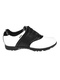

In [55]:
Image('1634.jpg') # given imput image

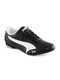

In [56]:
Image(datanames[indices[0][1]])   #find the first similar image

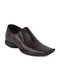

In [57]:
Image(datanames[indices[0][2]])   #find the second similar image

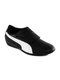

In [58]:
Image(datanames[indices[0][3]])   #find the third similar image

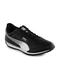

In [59]:
Image(datanames[indices[0][4]])   #find the forth similar image

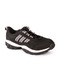

In [60]:
Image(datanames[indices[0][5]])   #find the fifth similar image